In [1]:
import cv2
import numpy as np 
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt

#### By upewnić się czy funkcja imread pakieto io wczytuje obrazy w formacie RGB przeprowadziłem poniższy eksperyment:

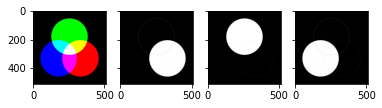

In [2]:
img = io.imread("unnamed.jpg")
fig, axs = plt.subplots(1 ,4)
axs[0].imshow(img);
axs[1].imshow(img[:,:,0], cmap="gray"); #R
axs[2].imshow(img[:,:,1], cmap="gray"); #G
axs[3].imshow(img[:,:,2], cmap="gray"); #B
for ax in axs.flat:
    ax.label_outer()

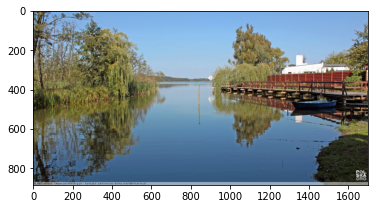

In [40]:
img = io.imread("https://polska-org.pl/foto/7666/Rzeka_Dojca_7666049.jpg")
plt.imshow(img);

# FUNCTIONS

In [46]:
def gray_scale(img):
    '''
    obliczanie RGB->GRAY przy użyciu średniej
    '''
    return img.mean(axis=2)

def gray_scale_weighted(img, weights=[0.2989, 0.5870, 0.1440]):
    '''
    obliczanie RGB->GRAY przy użyciu wag
    '''
    return np.dot(img[...,:3], weights)

def get_hist_flatten(img):
    '''
    wypłaszczanie zdjęcia
    '''
    return img.flatten()

def plot_rgb(R,G,B, indx):
    fig, axs = plt.subplots(1 ,3)
    axs[0].bar(indx, R, 1, color='r')
    axs[0].set_title('RED')
    axs[1].bar(indx, G, 1, color='g');
    axs[1].set_title('GREEN')
    axs[2].bar(indx, B, 1, color='b');
    axs[2].set_title('BLUE');
    fig.tight_layout(pad=3.0)

def get_hist_rgb(img):
    '''
    obliczanie histogramu dal każdego z kanałów
    '''
    args = []
    indx = np.arange(0, 256)
    channels = split_channels(img)
    for c in channels:
        args.append(get_hist_for_loop(c)[0])
    args.append(indx)
    return args

def get_hist_for_loop(img):
    '''
    obliczanie histogramu
    '''
    x, y = img.shape
    pixels = np.arange(0, 256)
    indx = np.arange(0, 256)
    for i in range(x):
        for j in range(y):
            pixels[img[i, j]]+=1 
    return pixels, indx

def split_channels(img):
    '''
    rozdzielenie zdjęcia na kanały
    '''
    return img[:,:,0], img[:,:,1], img[:,:,2] # 

def get_binarized(img, th=125):
    '''
    binaryzacja warunkowa
    '''
    return 1.0*(img > th)

def gamma_trans(img, gamma):
    gamma_table = [np.power(x / 255.0, gamma)*255.0 for x in range(256)] # tworzenie tablicy 
    gamma_table = np.round(np.array(gamma_table)).astype(np.uint8) # zaokrąglanie oraz zmiana typu
    return gamma_table[img] # geenrowanie zdjecia wyjściowego przy użyciu indeksowania tablicy

# GRAY

##### Wyniki przy użyciu własnej funkcji przetwarzania obrazu 3 kanałowego na mono przy użyciu średniej:

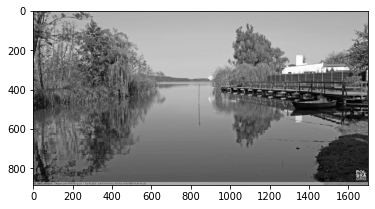

In [47]:
plt.imshow(gray_scale(img), cmap='gray');

##### Wyniki przy użyciu własnej funkcji przetwarzania obrazu 3 kanałowego na mono przy użyciu wag:

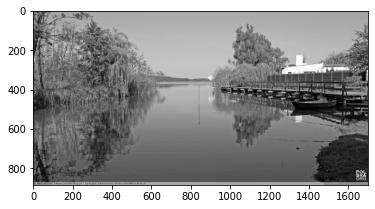

In [8]:
plt.imshow(gray_scale_weighted(img), cmap='gray');

##### Wyniki przy użyciu biblioteki cv2

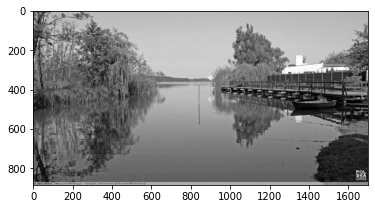

In [9]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cmap='gray');

# HIST

##### Wyniki przy użyciu wypłaszczenia danych oraz za pomocą funkcji plt.hist:

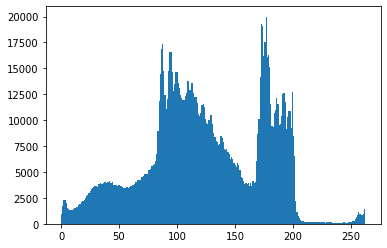

In [26]:
plt.hist(gray_scale_weighted(img).ravel(), bins=256);

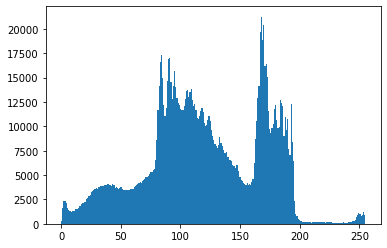

In [11]:
plt.hist(get_hist_flatten(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)), bins=256);

##### Wyniki własnej funkcji obliczającej histogram za pomocą pętli for:

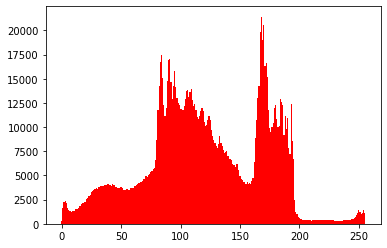

In [12]:
values, indx = get_hist_for_loop(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
plt.bar(indx, values, 1, color='r');

##### Wyniki własnej funkcji obliczającej histogram za pomocą pętli for dla każdego z 3 kanałów:

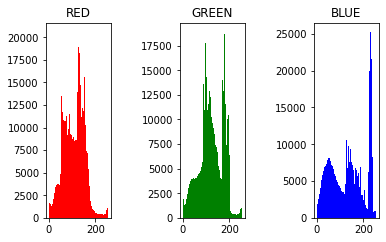

In [13]:
plot_rgb(*get_hist_rgb(img))

na powyższych wykresach można zuważyc że kolor niebieski występował najcześciej z wysokimi wartościami

# BINARIZATION

### binaryzjacja dla progu = 165

In [32]:
th = 165

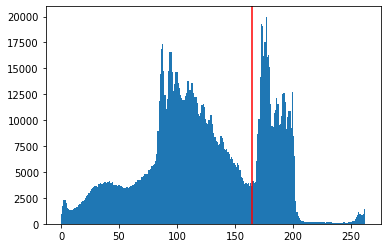

In [33]:
plt.hist(gray_scale_weighted(img).ravel(), bins=256);
plt.axvline(x=th, color='r', linestyle='-');

##### Wyniki przy użyciu biblioteki cv2:

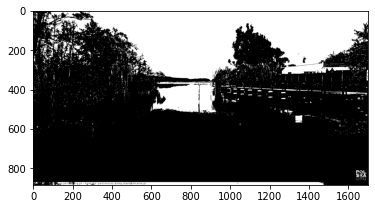

In [34]:
_, img_th = cv2.threshold(gray_scale_weighted(img), th, 255, cv2.THRESH_BINARY)
plt.imshow(img_th, cmap='gray');

##### Wyniki własnej funkcji:

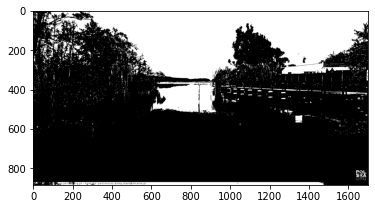

In [35]:
plt.imshow(get_binarized(gray_scale_weighted(img), th), cmap='gray');

# LUT

### gamma dla rgb współczynnik = 0.3

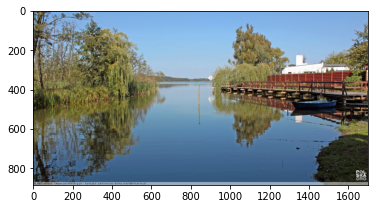

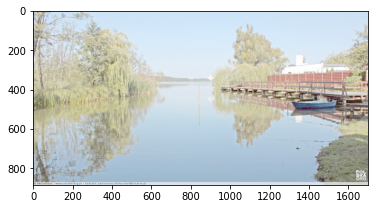

In [17]:
plt.imshow(img, cmap='gray');
plt.show()
plt.imshow(gamma_trans(img, 0.3), cmap='gray');

widzimy rozjaśnienie się zdjęcia, kolory wydają się być mniej nasycone

### gamma dla rgb współczynnik = 1.7

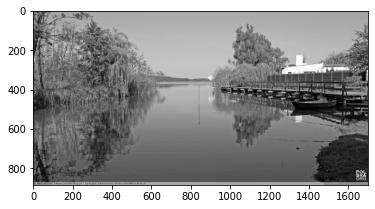

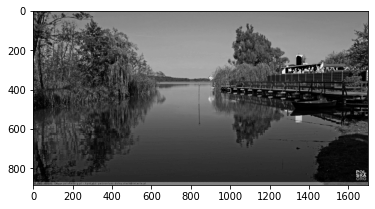

In [21]:
plt.imshow(gray_scale_weighted(img), cmap='gray');
plt.show()
plt.imshow(gamma_trans(gray_scale_weighted(img).astype(np.uint8), 1.7), cmap='gray');

widzimy przyciemnienie się zdjęcia, odcienie wydają się być bardziej nasycone

##  indexing method

In [20]:
gamma_table = [np.power(x / 255.0, 0.3)*255.0 for x in range(256)]
gamma_table = np.round(np.array(gamma_table)).astype(np.uint8)
d = np.array([[0, 1, 2, 3, 4, 5],
              [6, 7, 8, 9, 10, 11],
              [12, 13, 14, 15, 16, 17],
              [18, 19, 20, 21, 22, 23],
              [24, 25, 26, 27, 28, 29],
              [30, 31, 32, 33, 34, 35],])

gamma_table[d]

array([[  0,  48,  60,  67,  73,  78],
       [ 83,  87,  90,  94,  97,  99],
       [102, 104, 107, 109, 111, 113],
       [115, 117, 119, 121, 122, 124],
       [125, 127, 129, 130, 131, 133],
       [134, 136, 137, 138, 139, 141]], dtype=uint8)

##### porównanie kolejno skali gamma, orginalnego zdjęcia oraz zdjęcia korekcji gammy 

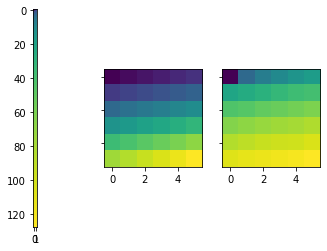

In [21]:
fig, axs = plt.subplots(1 ,3)
axs[0].imshow(gamma_table.reshape(128,2)); #scale - gamma table
axs[1].imshow(d); #org
axs[2].imshow(gamma_table[d]); #gamma applied
for ax in axs.flat:
    ax.label_outer()

# ZADANIE: użycie powyższych funkcji dal 4 zdjęć 

In [63]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

************* zdjecie: 1 **************
org:


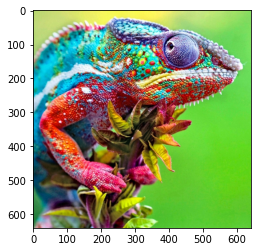

gray weighted:


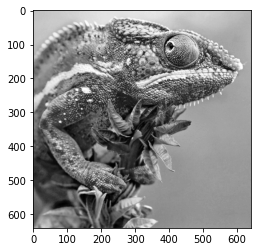

histogram gray:


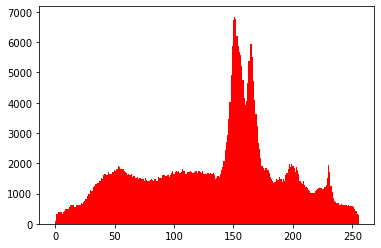

histogram RGB:


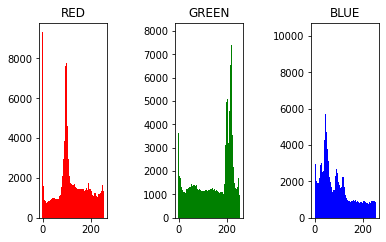

binaryzacja th = 165:


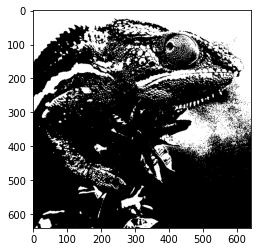

gamma RGB, y = 0.3:


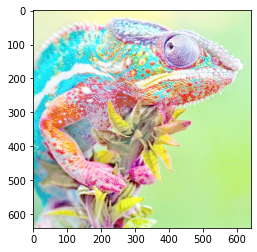

gamma GRAY, y = 1.7:


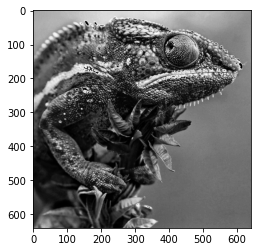

****** ********************* ******* 
 
 
 

************* zdjecie: 2 **************
org:


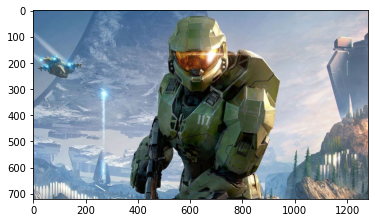

gray weighted:


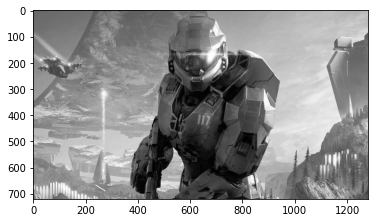

histogram gray:


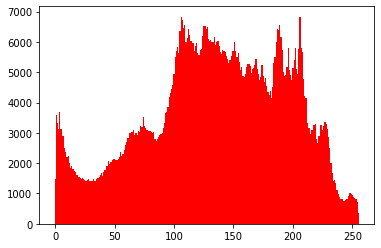

histogram RGB:


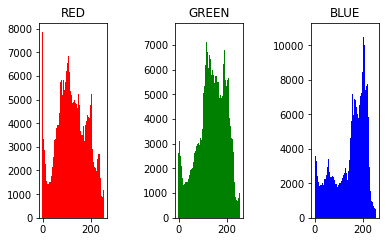

binaryzacja th = 165:


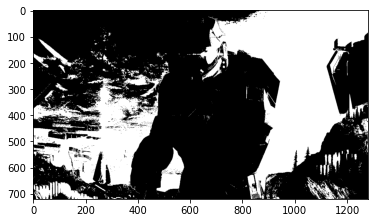

gamma RGB, y = 0.3:


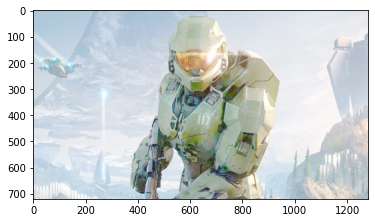

gamma GRAY, y = 1.7:


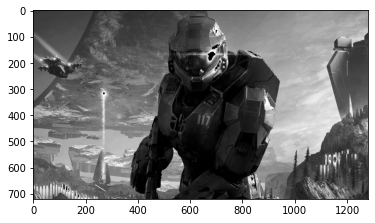

****** ********************* ******* 
 
 
 

************* zdjecie: 3 **************
org:


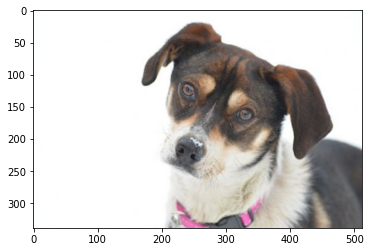

gray weighted:


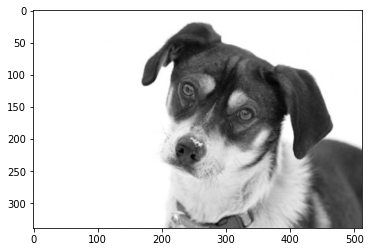

histogram gray:


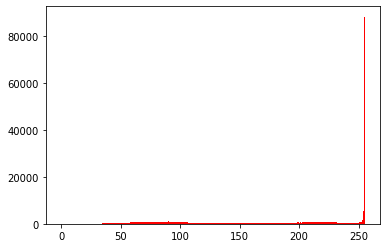

histogram RGB:


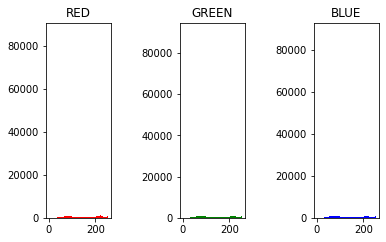

binaryzacja th = 165:


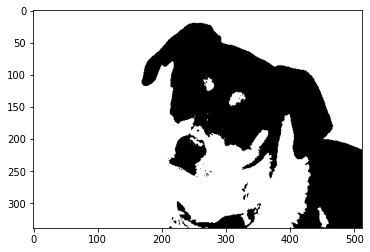

gamma RGB, y = 0.3:


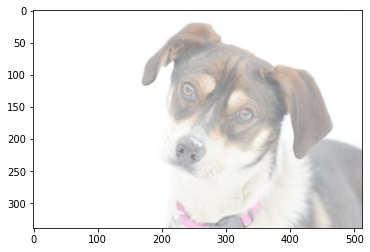

gamma GRAY, y = 1.7:


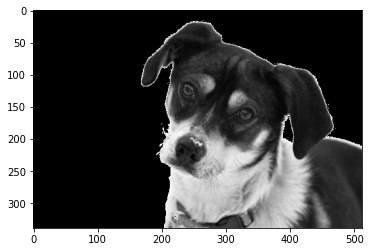

****** ********************* ******* 
 
 
 

************* zdjecie: 4 **************
org:


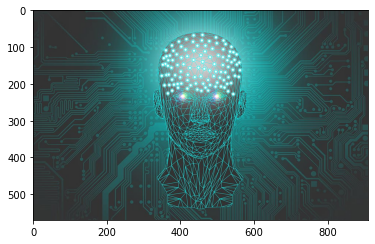

gray weighted:


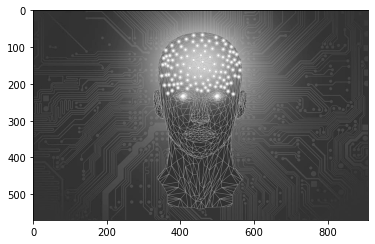

histogram gray:


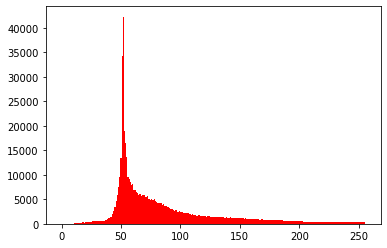

histogram RGB:


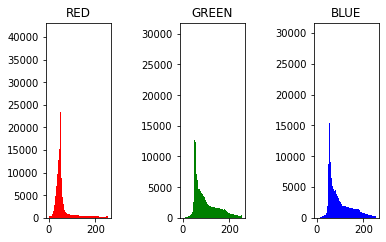

binaryzacja th = 165:


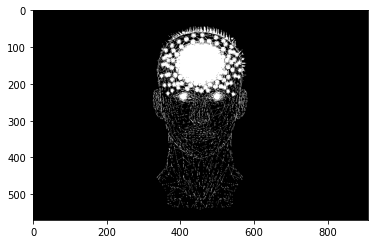

gamma RGB, y = 0.3:


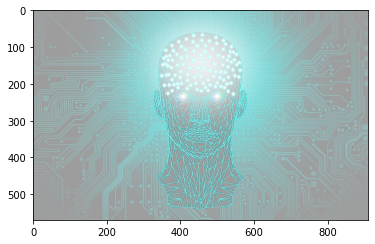

gamma GRAY, y = 1.7:


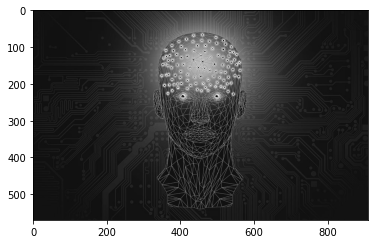

****** ********************* ******* 
 
 
 



In [65]:
for i in range(1,5):
    print('************* zdjecie: {} **************'.format(i))
    img = plt.imread("zdj/{}.jpg".format(i))
    
    print('org:')
    plt.imshow(img)
    plt.show()
    
    print('gray weighted:')
    plt.imshow(gray_scale_weighted(img), cmap='gray');
    plt.show()
    
    print('histogram gray:')
    values, indx = get_hist_for_loop(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
    plt.bar(indx, values, 1, color='r');
    plt.show()
    
    print('histogram RGB:')
    plot_rgb(*get_hist_rgb(img))
    plt.show()
    
    print('binaryzacja th = 165:')
    plt.imshow(get_binarized(gray_scale_weighted(img), th), cmap='gray');
    plt.show()
    
    print('gamma RGB, y = 0.3:')
    plt.imshow(gamma_trans(img, 0.3), cmap='gray');
    plt.show()
    
    print('gamma GRAY, y = 1.7:')
    plt.imshow(gamma_trans(gray_scale_weighted(img).astype(np.uint8), 1.7), cmap='gray');
    plt.show()
    
    print('****** ********************* ******* \n \n \n \n')